In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_qt = predictions("qtum_price.csv")
df_qt.data = df_qt.data.reindex(index=df_qt.data.index[::-1])

            Open  High   Low  Close       Volume Market Cap    Mean
2017-05-24  6.42  6.76  5.68   6.19  1,12,21,600          -  6.2625
2017-05-25  6.19  6.29  4.57   4.66    62,11,020          -  5.4275
2017-05-26  4.66  5.33  3.39   4.10    51,16,020          -  4.3700
2017-05-27  4.05  4.53  3.19   4.53    70,46,840          -  4.0750
2017-05-28  4.86  5.06  4.19   4.62    43,53,380          -  4.6825
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2017-05-24 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          273 non-null float64
High          273 non-null float64
Low           273 non-null float64
Close         273 non-null float64
Volume        273 non-null object
Market Cap    273 non-null object
Mean          273 non-null float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB
None
---------------------------------------------------------------
Open          0
High          0


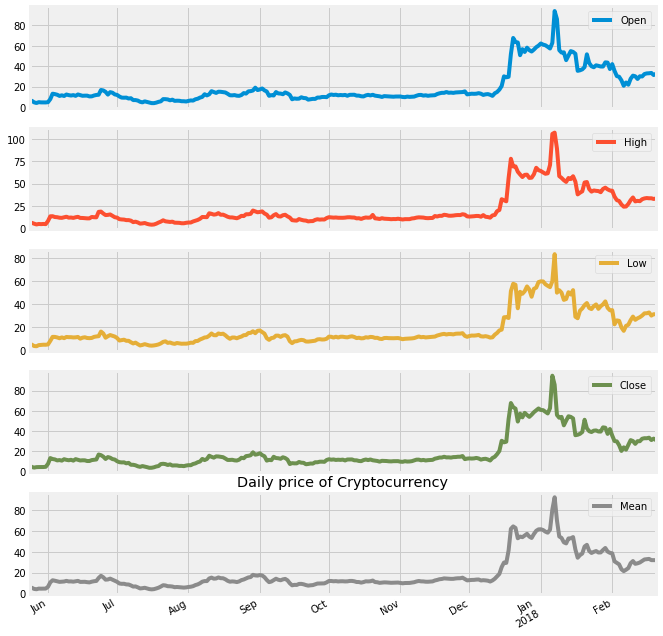

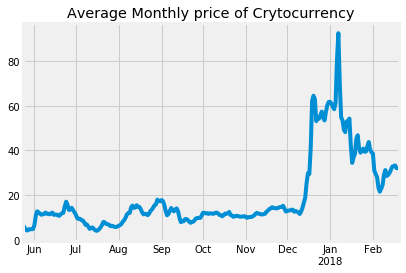

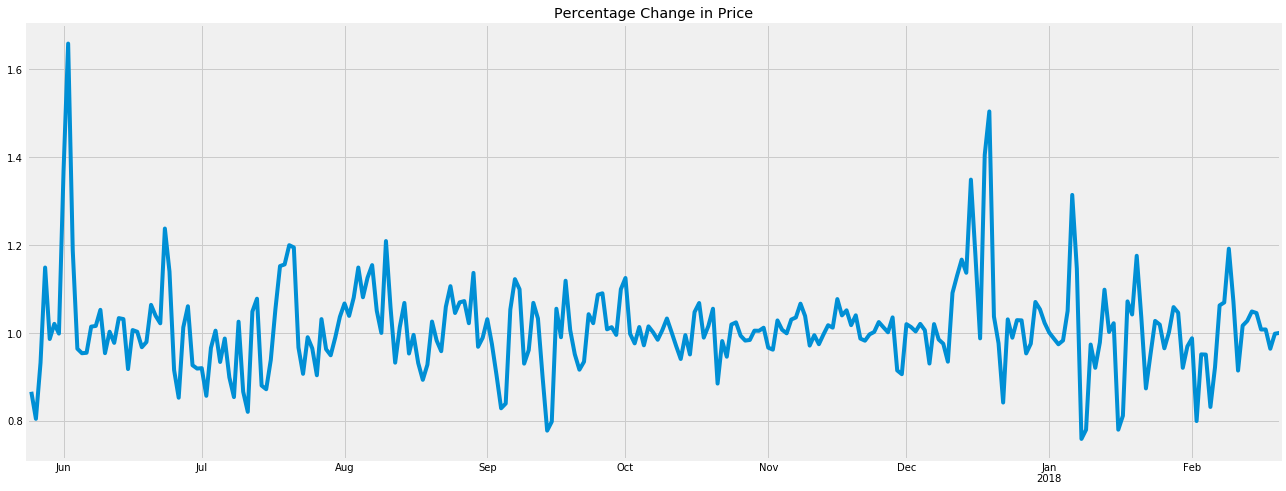

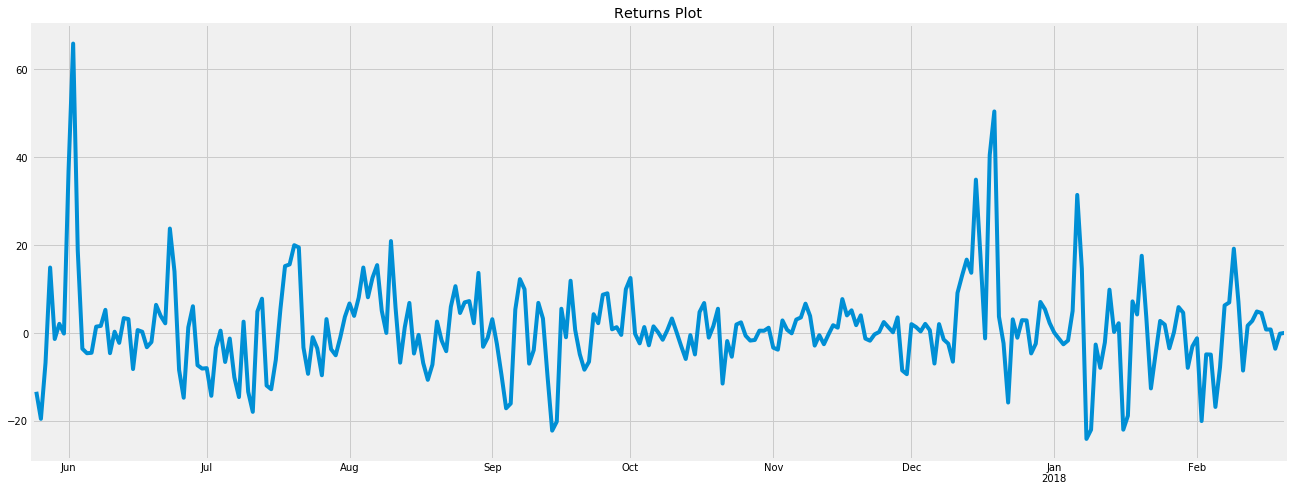

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


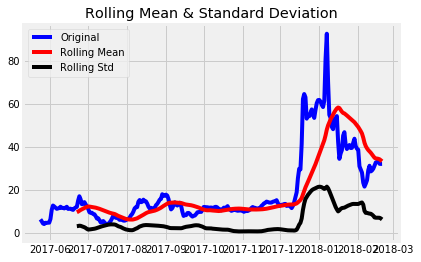

Results of Dickey-Fuller Test
Test Statistic                  -1.604826
p-value                          0.481169
#Lags Used                       9.000000
Number of Observations Used    263.000000
Critical Value(1%)              -3.455461
Critical Value(5%)              -2.872593
Critical Value(10%)             -2.572660
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.936996
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.701
P-value                         0.431
Lags                               16
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_qt.description()
df_qt.missing()
df_qt.plot_daily()
df_qt.plot_monthly()
df_qt.Percent_change()
df_qt.Returns()
df_qt.stationarity_test()

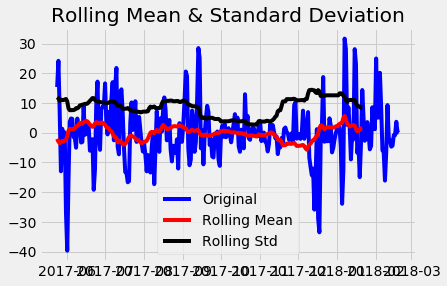

Results of Dickey-Fuller Test
Test Statistic                -6.038552e+00
p-value                        1.363374e-07
#Lags Used                     4.000000e+00
Number of Observations Used    2.670000e+02
Critical Value(1%)            -3.455081e+00
Critical Value(5%)            -2.872427e+00
Critical Value(10%)           -2.572571e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.04911
p-value                   0.10000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [4]:
from Model import *
qt_ret = model(df_qt.data)
qt_ret.stationarity_test()

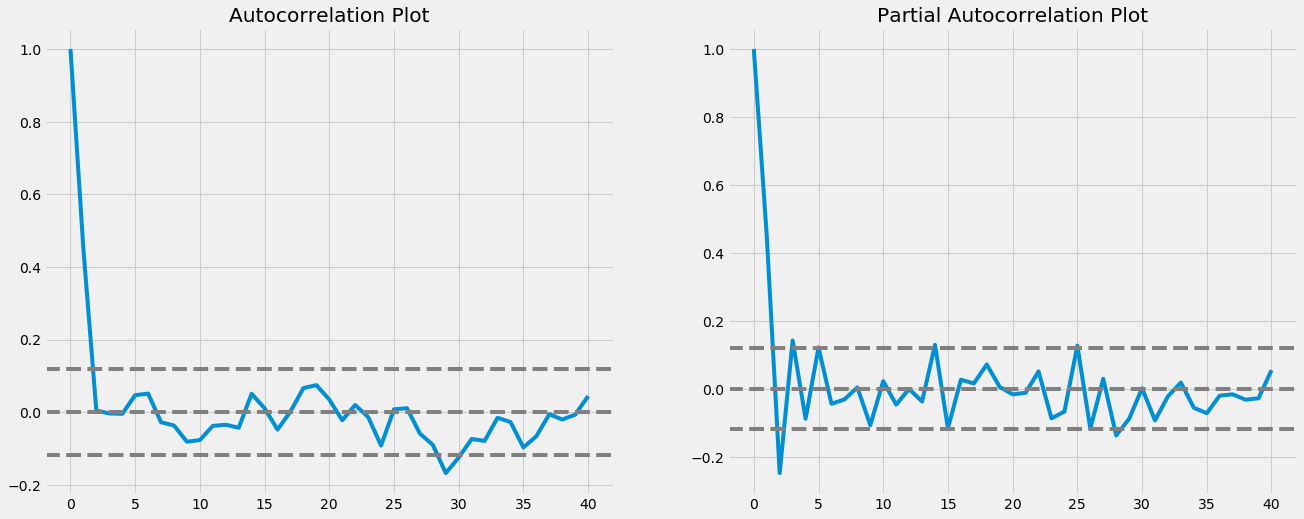

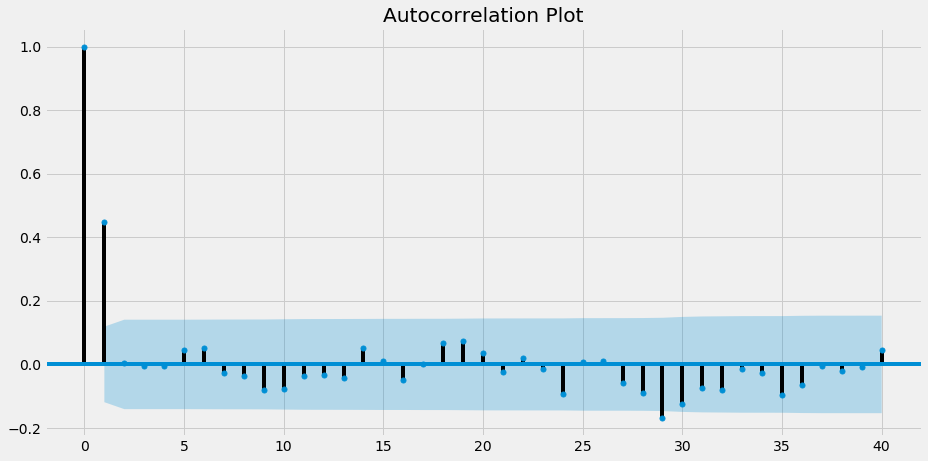

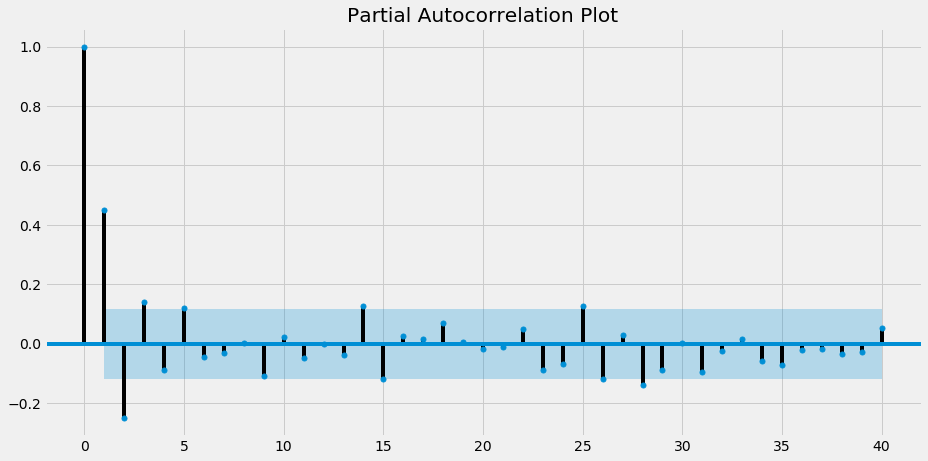

In [5]:
qt_ret.lags()
qt_ret.auto_graphics()
qt_ret.partial_graphics()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Results: ARMA
Model:              ARMA             BIC:                 1934.9507 
Dependent Variable: Returns          Log-Likelihood:      -956.26   
Date:               2019-10-18 18:05 Scale:               1.0000    
No. Observations:   272              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       269                                   05-24-2017
Converged:          1.0000           S.D. of innovations: 8.133     
No. Iterations:     11.0000          HQIC:                1926.318  
AIC:                1920.5275                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -0.1113    0.8010  -0.1389  0.8896  -1.6813  1.4587
ar.L1.Returns      0.0164    0.0927   0.1767  0.8599  -0.1

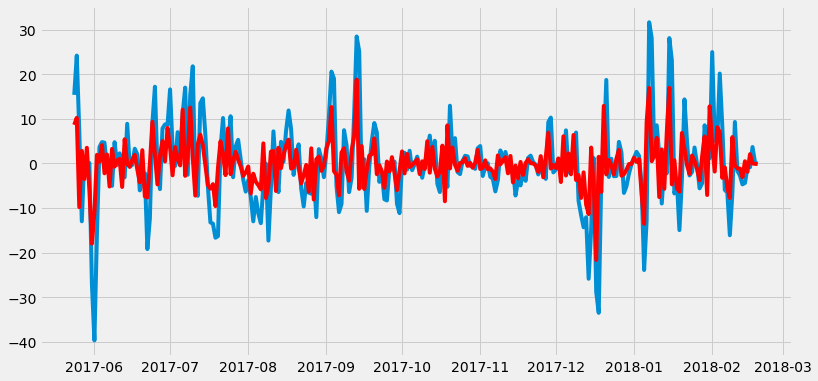

In [6]:
qt_ret.ARIMA_model(1,1)
qt_ret.plot_predict()

In [4]:
df_qt.data = df_qt.data['2017-01-01':]

In [7]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
qt_sarima = produce_predict(df_qt.data)

In [9]:
qt_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:2534.7220128978724
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:2176.551669671889
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:2117.0952230091957
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:1838.2211062866036
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:2110.626269780293
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:2029.1926693813848
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:1848.0917695111948
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:1841.9462185274556
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:2174.0471187051658
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:1863.0118312578115
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:1812.9366574799847
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:1566.388068782602
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:1809.9344110426014
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:1727.1046093220473
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:1582.6905133596058
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:1570.3126673533454
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:1396.001734606723
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:1266.6898084032414
ARIMA(0, 1, 0)x(0, 1, 0, 30) - A

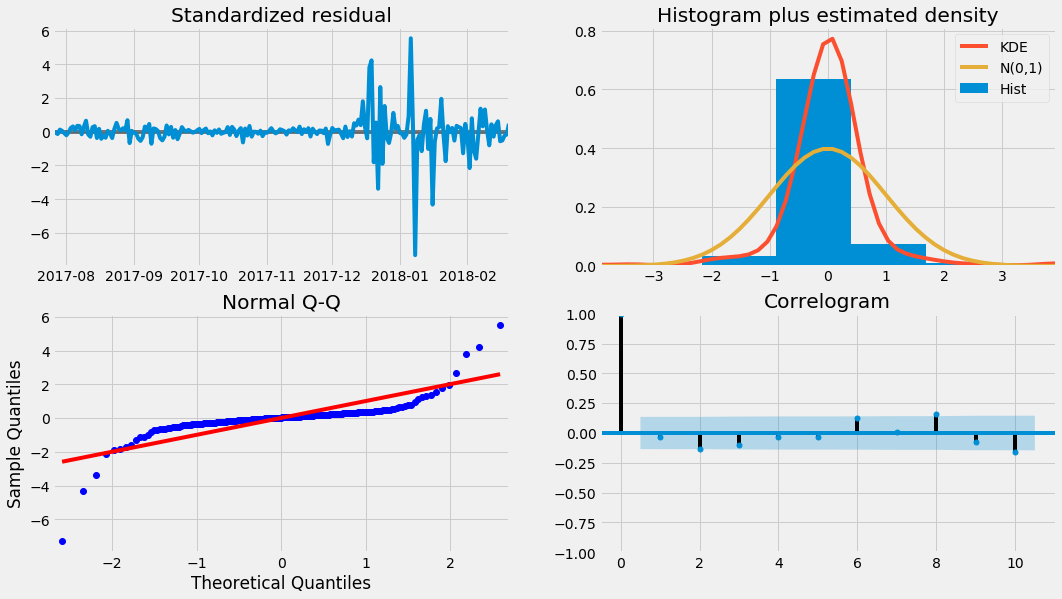

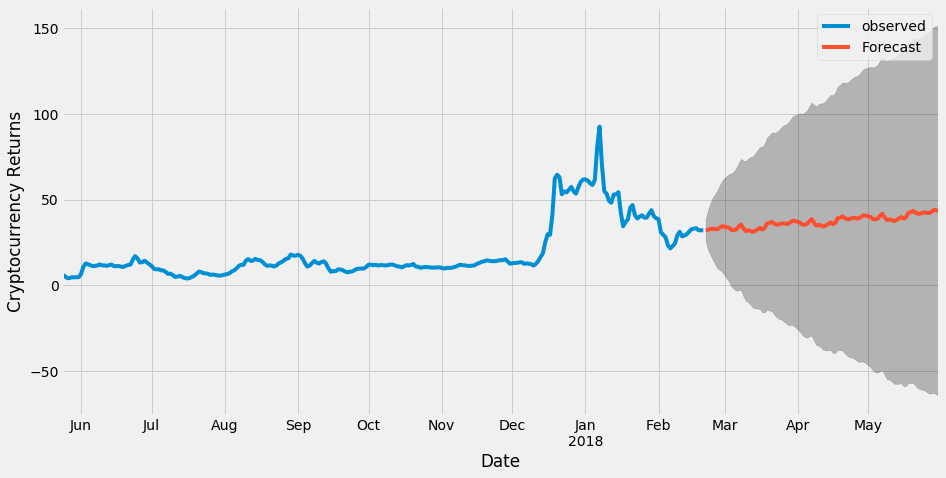

In [10]:
qt_sarima.sarima_model((0,1,1),(0,1,1,30))
qt_sarima.diagnostics()
qt_sarima.produce_forecast()

In [12]:
from fbprophet import Prophet
from prophet_model import *
qt_pro = prophet_model("qtum_price.csv",0)

<Figure size 1296x432 with 0 Axes>

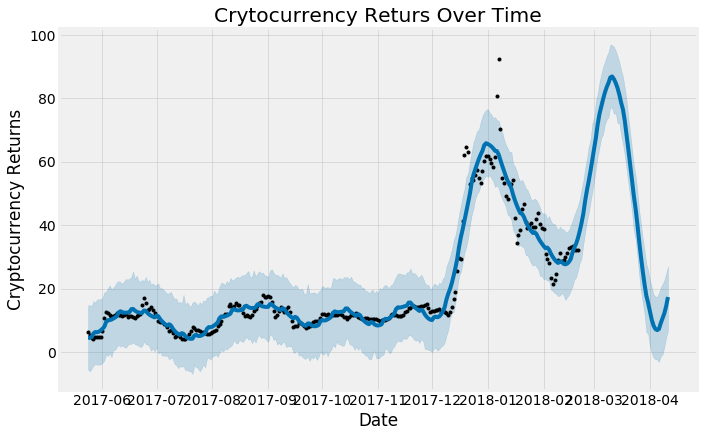

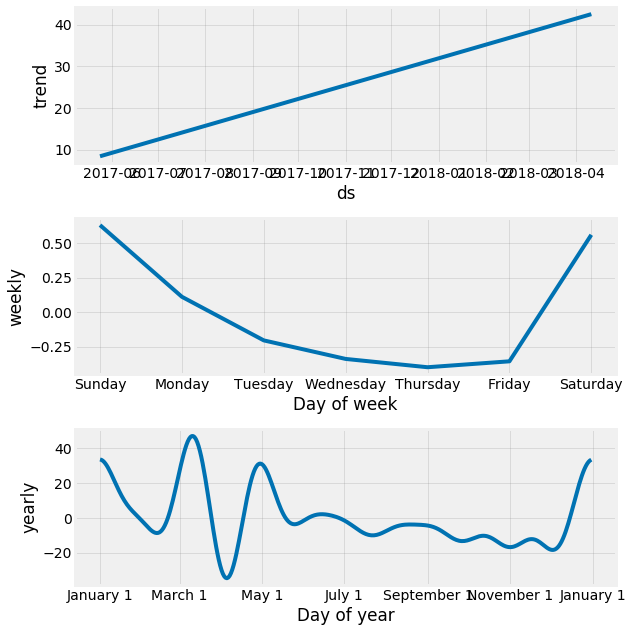

In [13]:
qt_pro.model()
qt_pro.forecast()
qt_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_qt.data)

C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


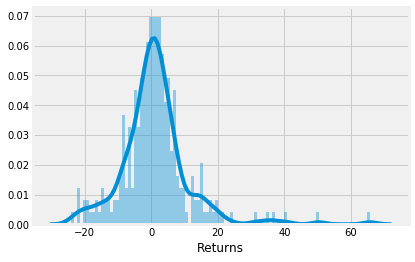

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -12.2064
95%                           -15.9781
99%                           -23.0532


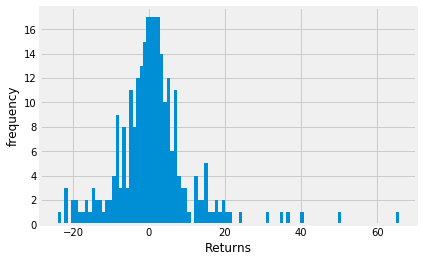

Confidence Interval      Value At Risk
---------------------  ---------------
90%                            -9.3264
95%                           -14.6035
99%                           -21.9515


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  -1.2610722547240443
